In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('Categorical.csv')
data = raw_data.copy()

In [3]:
def calculate_distance(data,continents):
    calculated_distance = {}
    for continent in continents:
        if continent != 'Europe':
            a = data.loc[data['continent'] == 'Europe'].iloc[:,1:3]
            b = data.loc[data['continent'] == continent].iloc[:,1:3]
            distance = np.linalg.norm(np.array(a)-np.array(b)[:,np.newaxis])
            calculated_distance[continent] = distance
    return calculated_distance

In [4]:
def convert_data(data):
    continent_list = {}
    continents = list(data['continent'].unique())
    distance = calculate_distance(data,continents)
    distance['Europe'] = 0
    converted_data = data.iloc[:, 3].map(distance)
    return converted_data

In [5]:
def k_means(convert_data):
    k = 4
    no_of_iterations = 4
    data_points = np.array(convert_data)

    #Step 1: Initialize random points, as centroids of the cluster
    copy_points = list(set(data_points.copy()))
    np.random.shuffle(copy_points)
    centroid = np.array(copy_points[:k])

#     print("The centroid has been randomly assigned as: \n {}".format(centroid))

    for i in range(no_of_iterations):

        #Step 2: Compute the distance between, each data point and centroid, and assign it to the closest centroid
        distances = np.sqrt(((data_points - centroid[:,np.newaxis])**2))
        re_assigned_cluster = np.argmin(distances, axis=0)
#         print("The closest cluster: \n {}".format(re_assigned_cluster))

        #Step 3: Re-compute the centroid, to move closer to the middle of the cluster
        centroid = np.array([data_points[re_assigned_cluster==k].mean(axis=0) for k in range(centroid.shape[0])])

#         print("The new centroids are:\n {}".format(centroid))

    return re_assigned_cluster

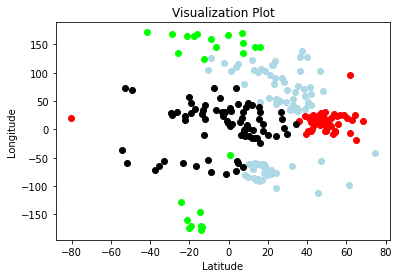

In [6]:
# Calculate the distance between continents using the latitudes and longitudes
convert_data = convert_data(data)

#Find the clusters, using K-Means Algorithm
identified_cluster = k_means(convert_data)
data['identified_cluster'] = identified_cluster

#Plot the graph
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Visualization Plot")
plt.scatter(data[data['identified_cluster']==0]['Latitude'],data[data['identified_cluster']==0]['Longitude'], c='#FF0000')
plt.scatter(data[data['identified_cluster']==1]['Latitude'],data[data['identified_cluster']==1]['Longitude'], c='#00FF00')
plt.scatter(data[data['identified_cluster']==2]['Latitude'],data[data['identified_cluster']==2]['Longitude'], c='#ADD8E6')
plt.scatter(data[data['identified_cluster']==3]['Latitude'],data[data['identified_cluster']==3]['Longitude'], c='#000000')